In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
# df = pd.read_csv("./auto-mpg.data", delimiter_whitespaces, header=None)
df = pd.read_csv("./auto-mpg.data", sep="\s+" , header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [4]:
new_columns =  ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
df.columns = new_columns
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


## Models are created using numerical values only 

In [5]:
df = df.drop(['car name'], axis=1)

In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    float64
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    float64
 5   acceleration  406 non-null    float64
 6   model year    406 non-null    float64
 7   origin        406 non-null    float64
dtypes: float64(8)
memory usage: 25.5 KB


In [8]:
df.isna().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [9]:
df = df.dropna()
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


In [10]:
# 1. target variable and feature variables
# 2. Understand the correlation between variables
# 3. create model

In [11]:
# y is the target that is mpg i.e fuel consumtion 
x = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
y = df['mpg']


In [12]:
df.corr()['mpg'].sort_values(ascending=False)

mpg             1.000000
model year      0.580541
origin          0.565209
acceleration    0.423329
cylinders      -0.777618
horsepower     -0.778427
displacement   -0.805127
weight         -0.832244
Name: mpg, dtype: float64

In [21]:
# y=mx+c
# simple linear regression
y = df['mpg']                     # target
x1 = df[['weight']]               # feature
x1 = sm.add_constant(x1)          # Intercept
model1 = sm.OLS(y, x1).fit()       # model
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Tue, 25 Nov 2025   Prob (F-statistic):          6.02e-102
Time:                        18:28:17   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Results
69% of the weight affects the mpg
the p value is less than 0.05 meaning there is statistical significance of between the weight and mpg 
that is weight is an important factor 


### Visualizations of mpg versus weight 

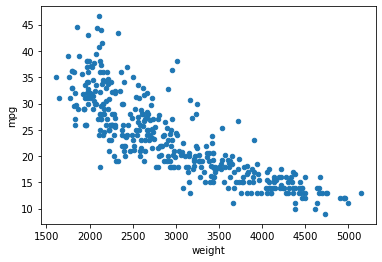

In [14]:
df.plot.scatter(x="weight", y="mpg");

This plot shows a strong negative correlation between the two variables that is mpg and weight.
It is evident that when the weight of the car increases the mpg decreases at 5000 the mpg is at 10.
lower mpg is more fuel consumption making it less efficient

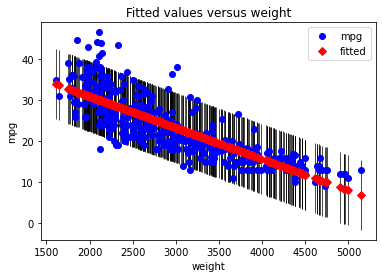

In [22]:
sm.graphics.plot_fit(model1, "weight")
plt.show()

It confirms the strong negative relationship between mpg and models
plus is shows that our model has successfully predicted the pattern we are trying to investigate

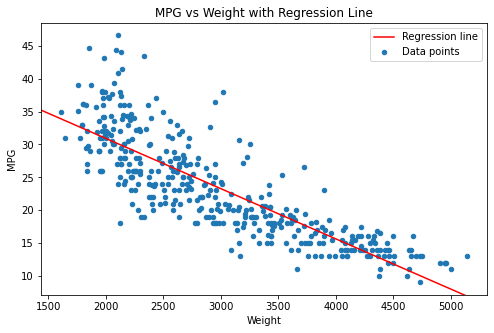

In [23]:
fig, ax = plt.subplots(figsize=(8,5))
df.plot.scatter(x="weight", y="mpg", label="Data points", ax=ax)

sm.graphics.abline_plot(model_results=model1, ax=ax, color="red", label="Regression line")

ax.set_xlabel("Weight")
ax.set_ylabel("MPG")
ax.set_title("MPG vs Weight with Regression Line")
ax.legend()
plt.show()

the regression line shows that as you move to the right the mpg reduces showing higher fuel consumption as the car weight increases

## Multi linear regression analysis

In [31]:
# Doing multi linear regression 
x2 = df[['weight', 'model year']]
x2 = sm.add_constant(x2)
model2 = sm.OLS(y, x2).fit()       # model
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     819.5
Date:                Tue, 25 Nov 2025   Prob (F-statistic):          3.33e-140
Time:                        19:22:05   Log-Likelihood:                -1037.6
No. Observations:                 392   AIC:                             2081.
Df Residuals:                     389   BIC:                             2093.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.3473      4.007     -3.581      0.000     -22.224      -6.470
weight        -0.0066      0.000    -30.911      0.000      -0.007      -0.006
model year     0.7573      0.049     15.308      0.000       0.660       0.855
==============================================================================
Omnibus:                       42.504   Durbin-Watson:                   1.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.997
Skew:                           0.670   Prob(JB):                     2.32e-16
Kurtosis:                       4.616   Cond. No.                     7.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Results
The R squared is 80% meaning that 80% of the change in mpg is explained by a variability in weight and the model year the car was made
the p value of less than 0.05 shows a significantly significant relationship between mpg and the weight and model year 
Meaning there are two important variables

### Visualizations

<Figure size 1080x360 with 0 Axes>

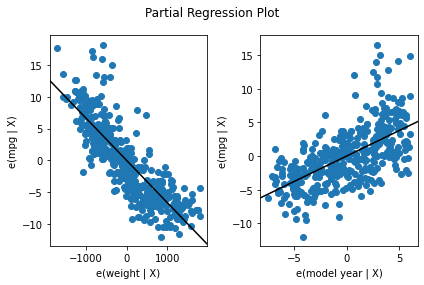

In [32]:
# Normal scatter plot instead we use a partial regression plot since we have more than one variable
fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(model2,exog_idx=['weight', 'model year'])
plt.tight_layout()
plt.show()

Weight has a strong negative correlation in that the heavier the vehicle the lower the mpg ie higher fuel consumption while model year has a strong positive correlation in that as the model year increases the mpg increases resulting to lower fuel consumption

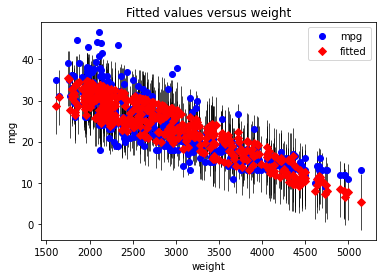

In [33]:
# Model fit for the two variables
sm.graphics.plot_fit(model2,"weight");

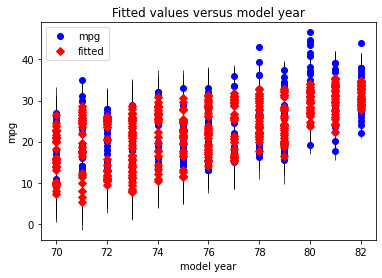

In [34]:
sm.graphics.plot_fit(model2,"model year");

This shows the true versus the predicted indicated by blue and red respectively overlap each other hence our model successfully predicted the pattern we are trying to analyze. It is not a straight line because the predictions are based on the overall model and not one variable

Alternatively we can create a plot for all the measureables using individual variables

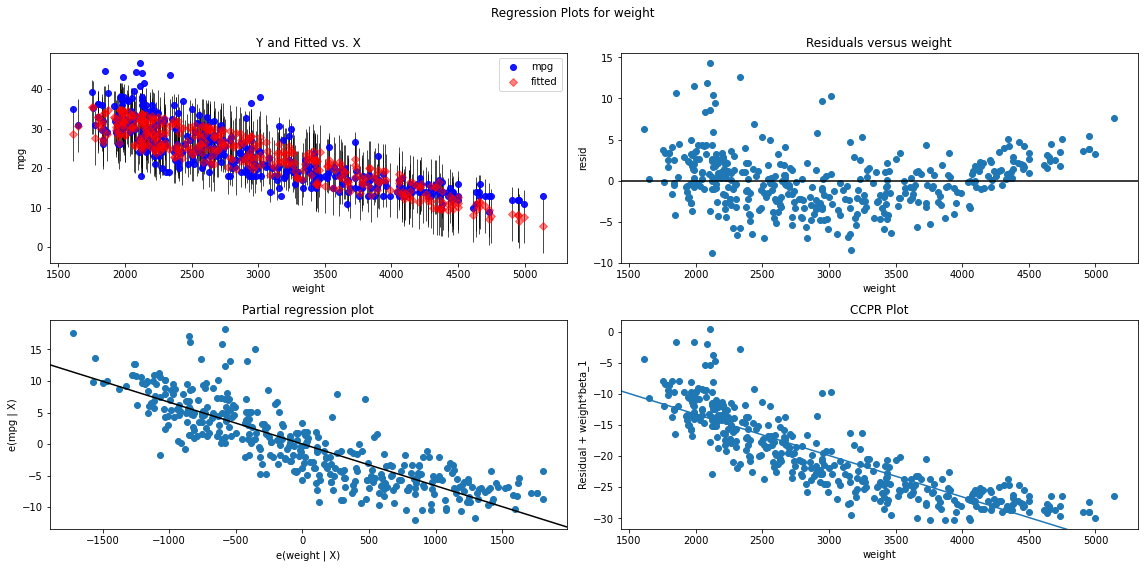

In [35]:
# for weight feature against the mpg target
fig = plt.figure(figsize=(16,8))
sm.graphics.plot_regress_exog(model2,'weight', fig=fig)
plt.show()

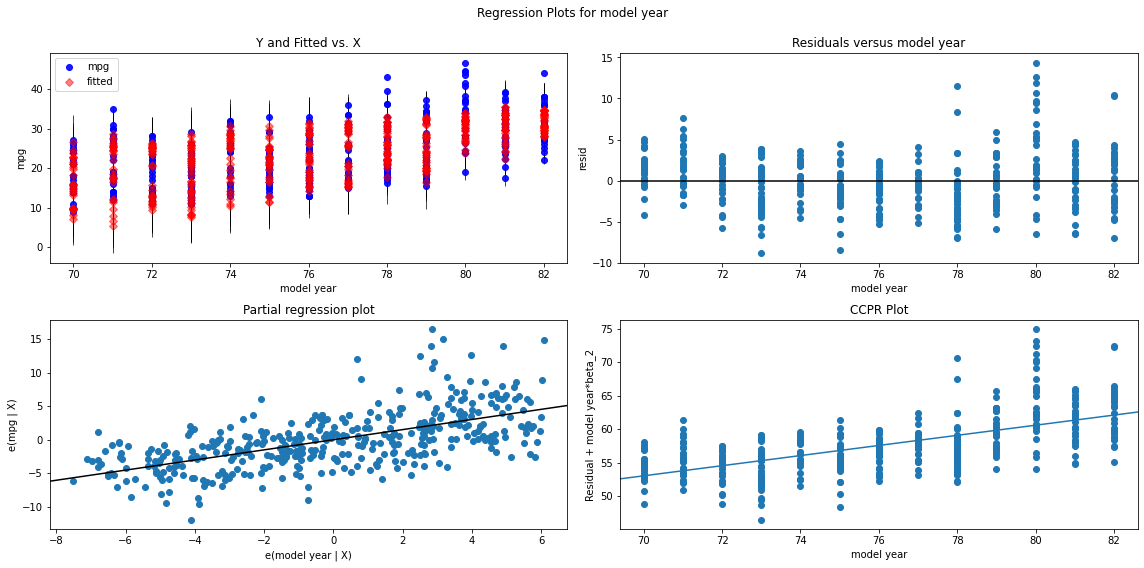

In [36]:
# regression plots for model year
fig = plt.figure(figsize=(16,8))
sm.graphics.plot_regress_exog(model2,'model year', fig=fig)
plt.show()

In [27]:
# Assignment doing a linear regression with a different feature and the same target
# Using cylinders and mpg
# cylinders has a negative correlation with mpg
# when the no of cylinders increases the mpg decreases
y = df['mpg']                        # target
x3 = df[['cylinders']]               # feature
x3 = sm.add_constant(x3)             # Intercept
model3 = sm.OLS(y, x3).fit()          # model
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     596.6
Date:                Tue, 25 Nov 2025   Prob (F-statistic):           1.31e-80
Time:                        18:46:48   Log-Likelihood:                -1179.3
No. Observations:                 392   AIC:                             2363.
Df Residuals:                     390   BIC:                             2371.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.9155      0.835     51.404      0.000      41.274      44.557
cylinders     -3.5581      0.146    -24.425      0.000      -3.844      -3.272
==============================================================================
Omnibus:                       38.938   Durbin-Watson:                   1.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.615
Skew:                           0.699   Prob(JB):                     1.38e-12
Kurtosis:                       4.179   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Results
The R squared 60% meaning that 60% of the variability of mpg is influenced by the no of cylinders the car has
The p value of 1.03 x 10`80 is lesser than 0.05 showing a significant statistical relationship between the two variables i.e no of cylinders and the mpg

### Visualizations

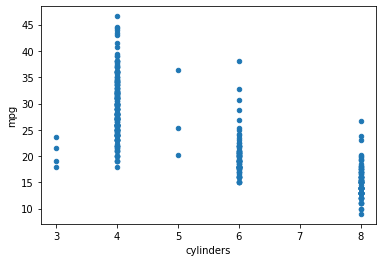

In [ ]:
# Normal scatter 
df.plot.scatter(x='cylinders', y='mpg');

Cars with fewer cylinders (3 and 4) tend to have a higher mpg that is more fuel consumption while cars with many cylinders (6 and 8) tend to have a lower mpg that is less fuel consumption
there is a strong negative correlation that is when the no of cylinders increases, the mpg decreases ie more fuel is used.

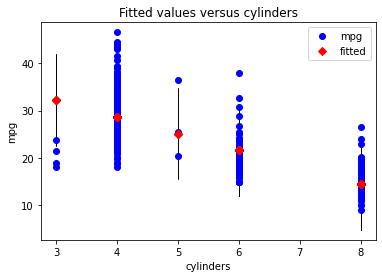

In [28]:
# Actual versus predicted values by OLS model
sm.graphics.plot_fit(model3,"cylinders")
plt.show()

This plot shows that the model has successfully predicted the pattern we are studying which is cars with more cylinders have a lower mpg(more fuel consumption)

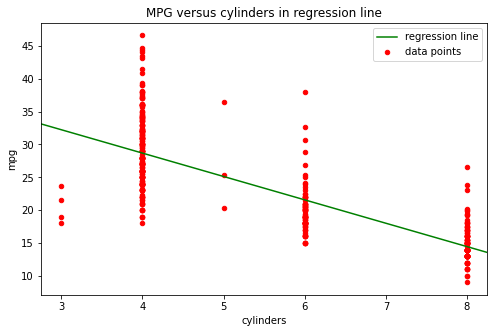

In [30]:
# plotting a scatter and regression line
fig,ax= plt.subplots(figsize=(8,5))
df.plot.scatter(x="cylinders", y="mpg", color="red", label="data points", ax=ax)
sm.graphics.abline_plot(model_results=model3, ax=ax, color="green", label="regression line")

ax.set_xlabel("cylinders")
ax.set_ylabel("mpg")
ax.set_title("MPG versus cylinders in regression line")
ax.legend()
plt.show()

The graph is showing that as you move to the right on the x-axis, cars use more fuel. The downward green line proves that mpg gets worse.

In [37]:
# Doing a multi linear regression 
y = df['mpg']                     # target
x4 = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]               # feature
x4 = sm.add_constant(x4)          # Intercept
model4 = sm.OLS(y, x4).fit()       # model
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 25 Nov 2025   Prob (F-statistic):          2.04e-139
Time:                        20:00:52   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
model year       0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Results
R squared is 82% showing there is a 82% variability of mpg that is influenced by cylinders, displacement, horsepower, weight, acceleration and model year of the car
the P value 2.04 x 10`139 is less than 0.05 showing a statistically significant relationship between mpg and other variables 

### Visualizations

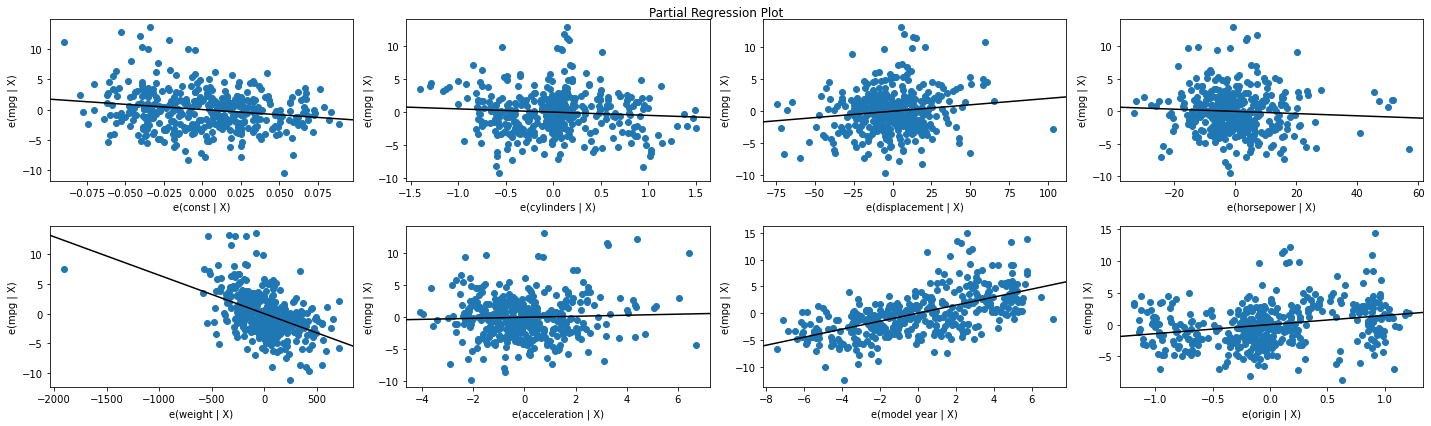

In [41]:
fig = plt.figure(figsize=(20,6))
sm.graphics.plot_partregress_grid(
    model4,
    exog_idx=list(x4.columns.values),
    grid=(2,4),
    fig=fig)
plt.show()